## 1. Historical Background

The ever-increasing healthcare costs globally have necessitated a comprehensive analysis of the factors contributing to these expenses. As healthcare expenditures continue to rise, it becomes imperative to understand the determinants of medical charges to aid individuals, healthcare providers, and policymakers in making informed decisions.

## 2. Statement of the Problem

The problem at hand is the analysis of medical costs and the identification of influential factors. Specifically, this project aims to investigate the relationships between individual attributes such as age, BMI, smoking habits, and other variables in relation to medical charges. Additionally, it intends to employ decision tree analysis to suggest insurance plans tailored to individual attributes.

## 3. Objectives



1.   To gain a profound understanding of the "Medical Cost Personal Datasets" dataset available on Kaggle.
2.   To explore and discern correlations between diverse attributes and medical charges.
3. To construct and assess regression models for predicting medical charges.
4. To implement decision tree analysis with the purpose of suggesting customized insurance plans based on individual attributes.



## 4. Hypotheses



*   Null Hypothesis (H0): There is no relationship between age, BMI, smoking status, and other attributes and medical charges.significant

*   Alternative Hypothesis (H1): There is a significant relationship between age, BMI, smoking status, and other attributes and medical charges.
*   Null Hypothesis (H0): Decision tree analysis does not significantly contribute to the accuracy of suggesting insurance plans.


*   Alternative Hypothesis (H1): Decision tree analysis significantly contributes to the accuracy of suggesting insurance plans.

## 5. Scope of the Study

This project will primarily concentrate on the "Medical Cost Personal Datasets" from Kaggle and investigate correlations, regression analysis, and decision tree analysis based on attributes within this dataset. External factors that may influence medical costs, such as changes in healthcare policies or economic factors, will not be considered.

While suggesting insurance plans is an application of this analysis, the project will not implement an actual insurance system.

## 6. Variables


*   Independent Variables: age, sex, BMI, children, smoking status, region
*   Dependent Variable: Medical charges (the target variable).



## 7. Method

### 7.1 Data Collection: Obtain and load the "Medical Cost Personal Datasets" from Kaggle.

In [1]:
import pandas as pd

In [2]:
# 1. Replace 'FILE_ID' with the actual file ID from the Google Drive link
file_id = '15-HdPg8jZIqYrf9l-k46wYgv7VhnmfeS'

# Construct the download link
download_link = f'https://drive.google.com/uc?id={file_id}'

In [3]:
# Download the file using wget
!wget --no-check-certificate -O medical_costs.csv $download_link

--2023-09-09 11:47:16--  https://drive.google.com/uc?id=15-HdPg8jZIqYrf9l-k46wYgv7VhnmfeS
Resolving drive.google.com (drive.google.com)... 172.253.63.100, 172.253.63.138, 172.253.63.101, ...
Connecting to drive.google.com (drive.google.com)|172.253.63.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-94-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rqp5ho9gk2vk4sakaolgl4od5qu21bo8/1694259975000/05408618479576862340/*/15-HdPg8jZIqYrf9l-k46wYgv7VhnmfeS?uuid=fde2c91a-24c5-4f9e-b91b-550f71424be3 [following]
--2023-09-09 11:47:16--  https://doc-00-94-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rqp5ho9gk2vk4sakaolgl4od5qu21bo8/1694259975000/05408618479576862340/*/15-HdPg8jZIqYrf9l-k46wYgv7VhnmfeS?uuid=fde2c91a-24c5-4f9e-b91b-550f71424be3
Resolving doc-00-94-docs.googleusercontent.com (doc-00-94-docs.googleusercontent.com)... 172.253.115.132, 2607:f8b0:4004:c06::84
Connecting to doc-0

In [4]:
# 2. Load the dataset into a Pandas DataFrame
data = pd.read_csv("medical_costs.csv")

In [5]:
# 3. Verify that the dataset has been loaded correctly by displaying the first few rows
print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


### 7.2 Data Exploration: Load the dataset and perform exploratory data analysis (EDA) to gain insights into the data's characteristics.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
# 1. Basic Information about the Dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [8]:
# 2. Summary Statistics of Numeric Columns
print(data.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [9]:
# 3. Count of Unique Values in Categorical Columns
print(data['sex'].value_counts())
print(data['smoker'].value_counts())
print(data['region'].value_counts())

male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


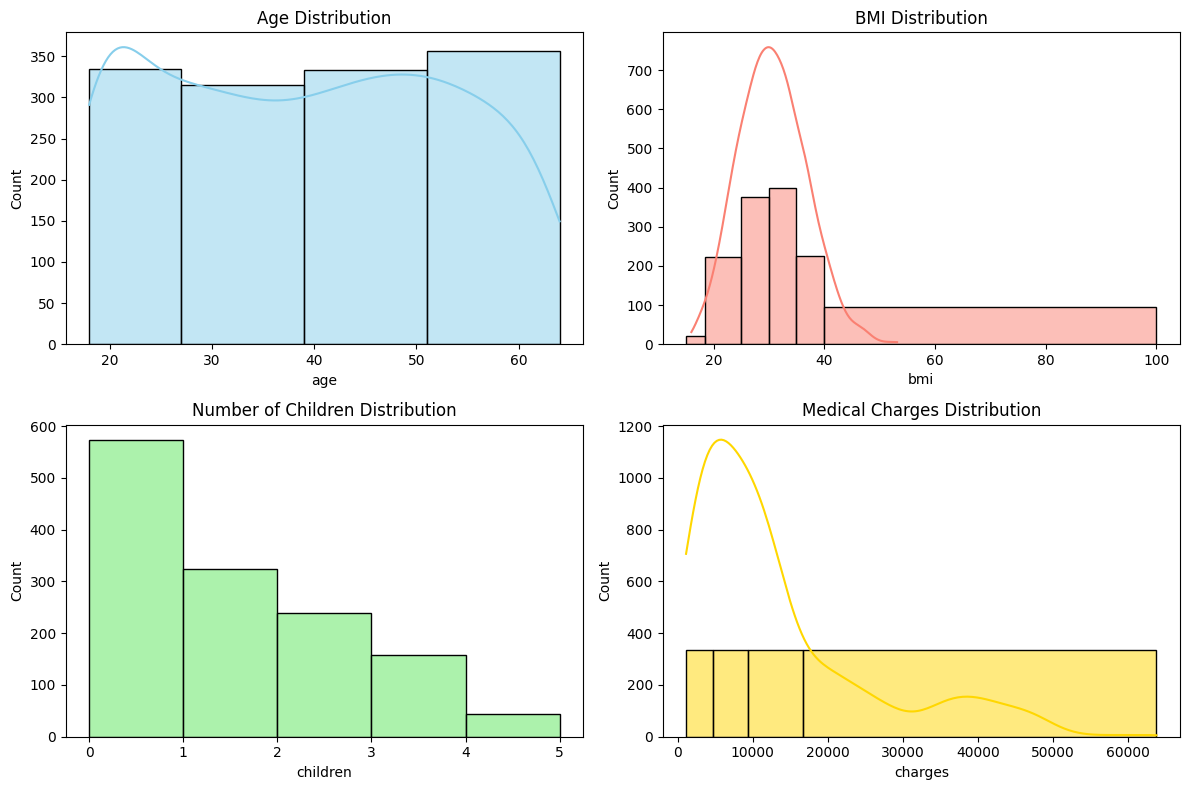

In [10]:
# 4. Histograms for Numeric Features

# 4.1 Histograms for Age Feature
# Define custom bin edges based on percentiles for 'age'
age_percentiles = np.percentile(data['age'], [0, 25, 50, 75, 100])
age_bins = age_percentiles  # Use percentiles as custom bin edges

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(data['age'], bins=age_bins, kde=True, color='skyblue')
plt.title('Age Distribution')

# 4.2 Histograms for BMI Feature
# Define custom bin edges based on BMI ranges
bmi_bins = [15, 18.5, 24.9, 29.9, 34.9, 39.9, 100]

plt.subplot(2, 2, 2)
sns.histplot(data['bmi'], bins=bmi_bins, kde=True, color='salmon')
plt.title('BMI Distribution')

# 4.3 Histograms for Children Feature
plt.subplot(2, 2, 3)
sns.histplot(data['children'], bins=5, color='lightgreen')
plt.title('Number of Children Distribution')

# 4.4 Histograms for Charges Feature
# Define custom bin edges based on percentiles for 'charges'
charges_percentiles = np.percentile(data['charges'], [0, 25, 50, 75, 100])
charges_bins = charges_percentiles  # Use percentiles as custom bin edges

plt.subplot(2, 2, 4)
sns.histplot(data['charges'], bins=charges_bins, kde=True, color='gold')
plt.title('Medical Charges Distribution')

plt.tight_layout()
plt.show()

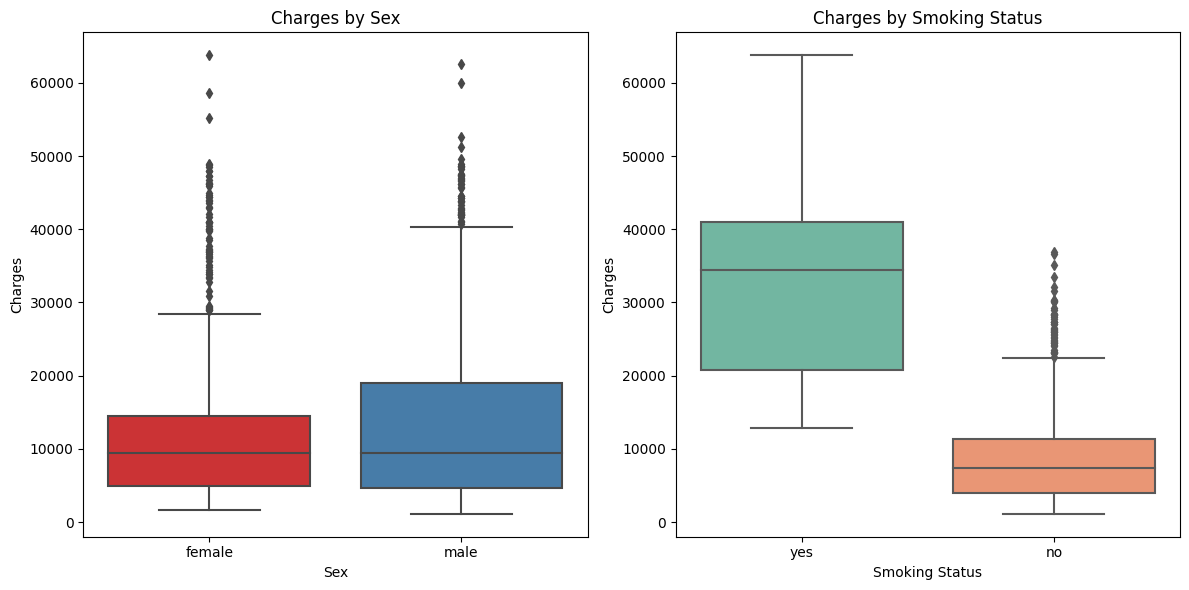

In [11]:
# 5. Box Plots for Categorical vs. Numeric Features
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='sex', y='charges', data=data, palette='Set1')
plt.title('Charges by Sex')
plt.xlabel('Sex')
plt.ylabel('Charges')

plt.subplot(1, 2, 2)
sns.boxplot(x='smoker', y='charges', data=data, palette='Set2')
plt.title('Charges by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Charges')

plt.tight_layout()
plt.show()

### 7.3 Data Preprocessing: Handle missing values, encode categorical features, and perform necessary data transformations.

In [15]:
# 1. Check how many missing values are there in each column
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [16]:
#2. Handle duplicates
data.duplicated().sum()

1

In [17]:
data.drop_duplicates(inplace = True)

In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [19]:
# 3. Encode categorical features using Label Encoding
label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])
data['region'] = label_encoder.fit_transform(data['region'])

In [20]:
# 4. Verify that categorical features encoded
print(data.head())

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


### 7.4 Correlation Analysis: Calculate the correlation matrix between variables. Create a heatmap using libraries.

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

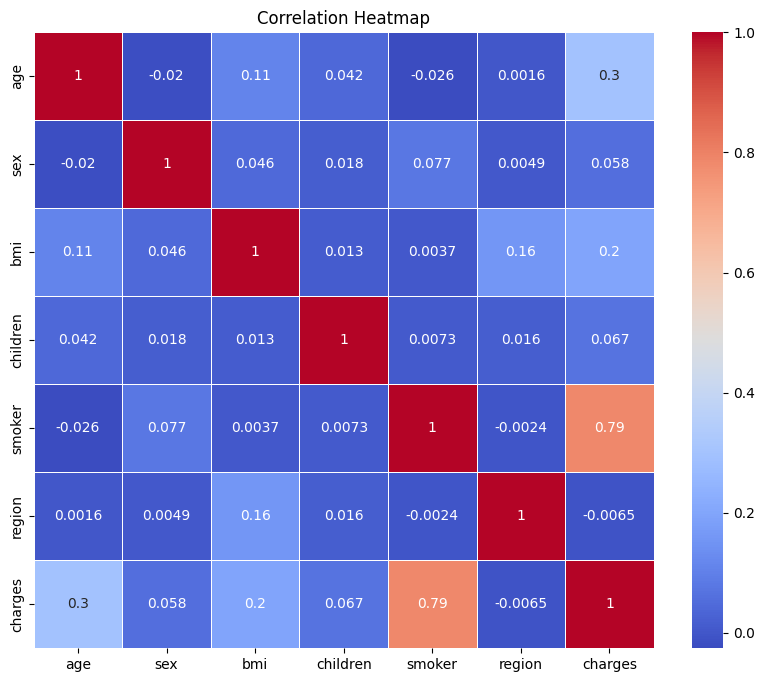

In [14]:
# 1. Calculate the correlation matrix
correlation_matrix = data.corr()

# 2. Create a heatmap for visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [40]:
print(correlation_matrix)

               age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.019814  0.109344  0.041536 -0.025587  0.001626  0.298308
sex      -0.019814  1.000000  0.046397  0.017848  0.076596  0.004936  0.058044
bmi       0.109344  0.046397  1.000000  0.012755  0.003746  0.157574  0.198401
children  0.041536  0.017848  0.012755  1.000000  0.007331  0.016258  0.067389
smoker   -0.025587  0.076596  0.003746  0.007331  1.000000 -0.002358  0.787234
region    0.001626  0.004936  0.157574  0.016258 -0.002358  1.000000 -0.006547
charges   0.298308  0.058044  0.198401  0.067389  0.787234 -0.006547  1.000000


### 7.5 Regression Analysis: Select "medical charges" as the target variable and conduct linear regression analysis.

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# 1. Define features and target variable
features = ['age', 'bmi', 'smoker']  # Specify the columns we want to use as features
X = data[features]  # Select only the specified columns
y = data['charges']

In [23]:
# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# 3. Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
# 4. Make predictions on the test set
y_pred = model.predict(X_test)

Text(0, 0.5, 'Predicted Charges')

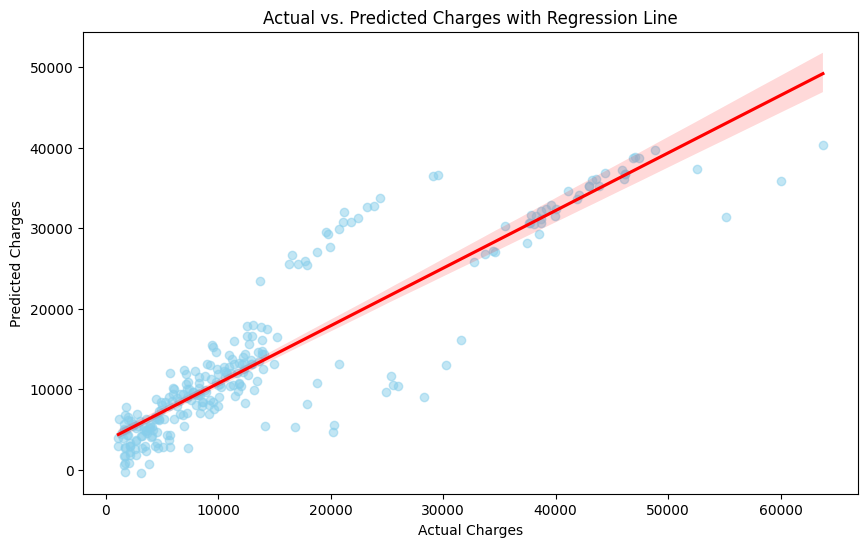

In [26]:
# 5. Create a scatter plot of actual vs. predicted values with the regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, color='skyblue', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Actual vs. Predicted Charges with Regression Line')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')

In [27]:
# 6. Add the regression formula to the plot
formula = f'y = {model.coef_[0]:.2f} * age + {model.coef_[1]:.2f} * bmi + {model.coef_[2]:.2f} * smoker + {model.intercept_:.2f}'

In [28]:
print(formula)

y = 251.88 * age + 304.80 * bmi + 23074.26 * smoker + -10770.89


In [29]:
# 7. Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

In [30]:
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 4191.704294603893
Root Mean Squared Error (RMSE): 5986.783344847843
R-squared (R2): 0.8049502474643171


### 7.6 Decision Tree Analysis: Implement decision tree analysis to suggest insurance plans based on individual attributes.

In [12]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.preprocessing import LabelEncoder

In [13]:
# 1. Define independent variables (features) and the target variable
features = ['age', 'bmi', 'smoker']

In [14]:
# 2. Encode categorical variables if needed
label_encoders = {}
for feature in features:
    if data[feature].dtype == 'object':
        le = LabelEncoder()
        data[feature] = le.fit_transform(data[feature])
        label_encoders[feature] = le

In [15]:
# 3. Define the categories based on percentiles of 'charges'
percentiles = [0, 0.25, 0.5, 0.75, 1.0]
charge_percentiles = data['charges'].quantile(percentiles)

In [16]:
def categorize_charges(charge):
    if charge <= charge_percentiles[0.25]:
        return 'Basic Plan'
    elif charge <= charge_percentiles[0.5]:
        return 'Standard Plan'
    else:
        return 'Premium Plan'

In [17]:
# 4. Create a new column for insurance plan categories
data['insurance_plan'] = data['charges'].apply(categorize_charges)

In [18]:
# 5. Initialize the decision tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

In [19]:
# 6. Fit the classifier on the training data
decision_tree_classifier.fit(data[features], data['insurance_plan'])

DecisionTreeClassifier(random_state=42)

In [20]:
# 7.Visualize the decision tree and extract rules
tree_rules = export_text(decision_tree_classifier, feature_names=features)

In [21]:
# Print the rules
print("Decision Tree Rules:\n")
print(tree_rules)

Decision Tree Rules:

|--- age <= 32.50
|   |--- smoker <= 0.50
|   |   |--- age <= 28.50
|   |   |   |--- age <= 22.50
|   |   |   |   |--- bmi <= 27.18
|   |   |   |   |   |--- age <= 18.50
|   |   |   |   |   |   |--- bmi <= 22.39
|   |   |   |   |   |   |   |--- bmi <= 21.62
|   |   |   |   |   |   |   |   |--- class: Basic Plan
|   |   |   |   |   |   |   |--- bmi >  21.62
|   |   |   |   |   |   |   |   |--- class: Premium Plan
|   |   |   |   |   |   |--- bmi >  22.39
|   |   |   |   |   |   |   |--- class: Basic Plan
|   |   |   |   |   |--- age >  18.50
|   |   |   |   |   |   |--- class: Basic Plan
|   |   |   |   |--- bmi >  27.18
|   |   |   |   |   |--- bmi <= 27.31
|   |   |   |   |   |   |--- class: Premium Plan
|   |   |   |   |   |--- bmi >  27.31
|   |   |   |   |   |   |--- age <= 21.50
|   |   |   |   |   |   |   |--- bmi <= 39.15
|   |   |   |   |   |   |   |   |--- bmi <= 38.90
|   |   |   |   |   |   |   |   |   |--- bmi <= 28.35
|   |   |   |   |   |   |   |   |

In [22]:
# 8. Get user input for age, bmi, and smoker
age = float(input("Enter your age: "))
bmi = float(input("Enter your BMI: "))
smoker_input = input("Are you a smoker? (yes/no): ").lower()
smoker = 1 if smoker_input == 'yes' else 0

Enter your age: 31
Enter your BMI: 24.1
Are you a smoker? (yes/no): no


In [23]:
# 9. Create a new data point for prediction
new_data_point = pd.DataFrame({'age': [age], 'bmi': [bmi], 'smoker': [smoker]})

In [24]:
# 10. Encode categorical variables
for feature in features:
    if new_data_point[feature].dtype == 'object':
        le = label_encoders[feature]  # Use the label encoder from training data
        new_data_point[feature] = le.transform(new_data_point[feature])

In [25]:
# 11. Make a prediction using the trained decision tree classifier
predicted_insurance = decision_tree_classifier.predict(new_data_point)

In [26]:
# 12. Get the suggested insurance category directly from the prediction
predicted_insurance_category = predicted_insurance[0]

In [27]:
# Print the suggested insurance category
print("Suggested Insurance Category:", predicted_insurance_category)

Suggested Insurance Category: Basic Plan


In [321]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [323]:
# 1. Make predictions on the test data
y_pred = decision_tree_classifier.predict(X_test)

In [324]:
# 2. Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test, y_pred)

In [325]:
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.9850746268656716
Precision: 0.9853423186466003
Recall: 0.9850746268656716
F1-Score: 0.9850148778325288
Confusion Matrix:
 [[ 68   0   0]
 [  1 135   0]
 [  1   2  61]]
